学号：              
姓名：  
上课校区：

# <center> <b> 实验四 无监督学习基础实验 </b> </center>  
本实验主要研究K-均值聚类和分层聚类的基本学习方法

## 实验目的
1. 了解K-均值聚类的工作原理和常见的聚类学习框架
2. 学习掌握numpy,scikit-learn等库的使用

## 实验工具
1. Anaconda, Jupyter Notebook
2. numpy, pandas,sklearn, matplotlib

## 实验内容
### 1. K-均值聚类方法(K Means Clustering)

**导入必要的学习库**  
需要注意的是，这里有个scikitplot的Python包。需要用pip install scikit-plot来安装   
引入必要的聚类方法

In [1]:
import pandas
import seaborn
import numpy
import scikitplot
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering 
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

**隐藏所有的报警信息**

In [2]:
import warnings
warnings.filterwarnings('ignore')

在K-均值实验中，实验数据集clustering_data_1.csv放在data目录中，利用pandas读取数据

In [3]:
clustering_data_1 = pandas.read_csv('./Datasets/clustering_data_1.csv')

查看数据的形状

In [4]:
clustering_data_1.shape

(2000, 2)

查看初始的5个数据样本

In [5]:
clustering_data_1.head()

,X,Y
0,-8.659655,1.344655
1,-4.765612,-8.923286
2,-8.744243,-0.576567
3,1.805738,-13.008058
4,-4.798434,-8.945116


总共有2000个数据样本，用X和Y作为数据特征，其散点分布如下图所示。  
显而易见，数据分为3个聚类簇群，但是机器并不知道这个聚类特点。   
下面的语句用分号";"结尾，表明不希望输出语句运行的过程结果，只显示最终图像

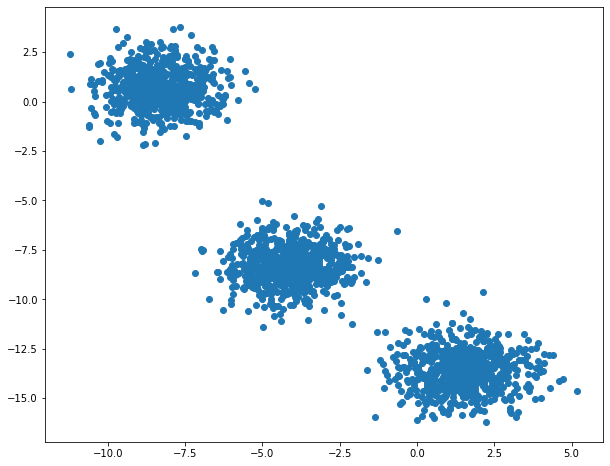

In [6]:
plt.scatter(clustering_data_1['X'],clustering_data_1['Y']);

我们首先用按照2个聚类来处理，看看效果如何？  
首先设定聚类簇数量为2，，即K=2。

In [7]:
kmeans = KMeans(n_clusters=2)

开始执行K-均值聚类操作

In [8]:
kmeans.fit(clustering_data_1)

KMeans(n_clusters=2)

看看聚类后数据样本的聚类分配效果

In [9]:
cluster_assignment = kmeans.predict(clustering_data_1)

依据聚类效果，绘制样本聚类分布图

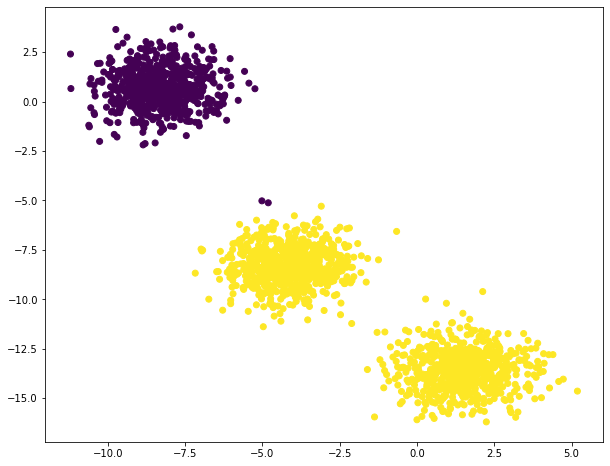

In [10]:
plt.scatter(clustering_data_1['X'],clustering_data_1['Y'],c=cluster_assignment)

上面的聚类效果可以用均方差MSE来表示，见后面的肘部法则图说明(Elbow Method)。我们可以继续尝试聚类簇数量为3的情况，即K=3。

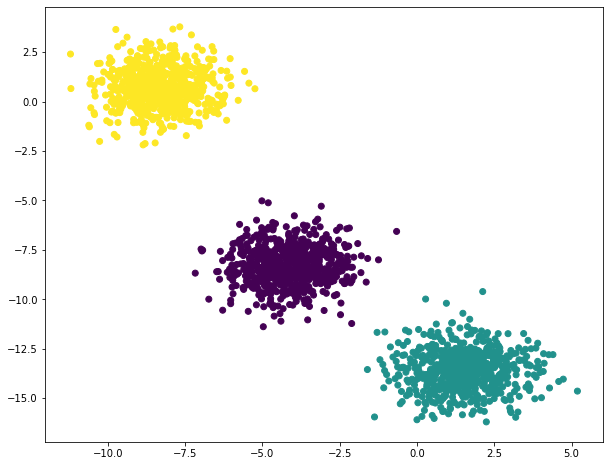

In [11]:
kmeans_3 = KMeans(n_clusters=3).fit(clustering_data_1)
cluster_assignment = kmeans_3.predict(clustering_data_1)
plt.scatter(clustering_data_1['X'],clustering_data_1['Y'],c=cluster_assignment);

我们可以尝试更改不同的聚类簇的表示颜色，更方便对聚类加以区分

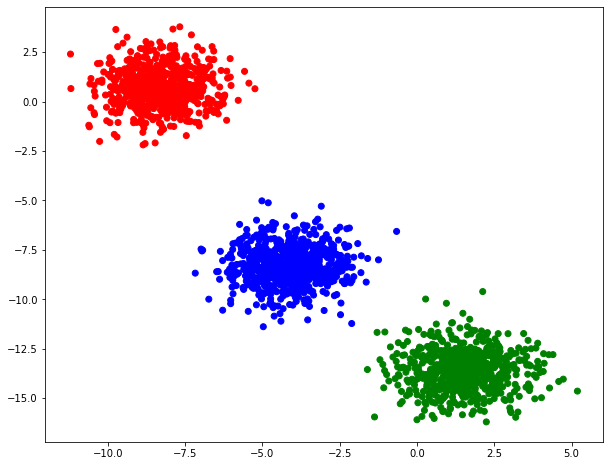

In [12]:
cluster_assignment = cluster_assignment.astype(str)
cluster_assignment[cluster_assignment == '0' ] = 'b'
cluster_assignment[cluster_assignment == '1' ] = 'g'
cluster_assignment[cluster_assignment == '2' ] = 'r'
plt.scatter(clustering_data_1['X'],clustering_data_1['Y'],c=cluster_assignment);

效果非常好！K-均值算法找到了最佳的聚类效果！K=3。

**如果我们不知道K值的取值选择，可以使用scikitplot包中的肘部法则曲线法来确定聚类簇数量的取值。**

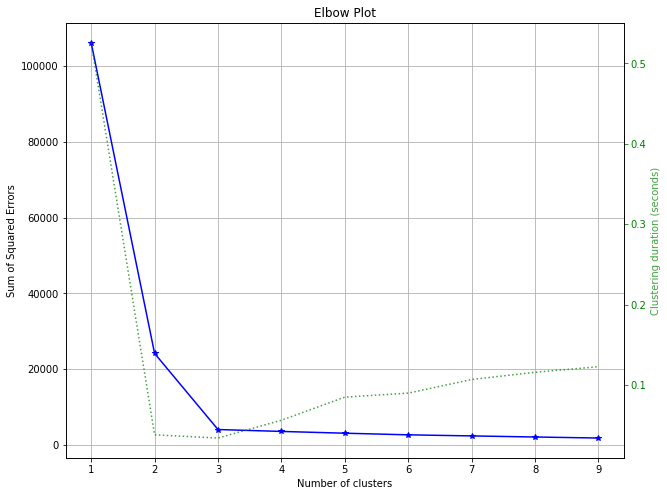

In [13]:
kmeans_elbow_check = KMeans()
scikitplot.cluster.plot_elbow_curve(kmeans_elbow_check,X=clustering_data_1, cluster_ranges=range(1, 10));

可以看出，曲线肘部位置位于K(Number of clusters)=3处。

下面我们再用K-均值方法试试对另一组数据进行聚类

In [14]:
clustering_data_2 = pandas.read_csv('./Datasets/clustering_data_2.csv')

In [15]:
clustering_data_2.head()

,X,Y
0,-0.472231,0.036999
1,-0.160415,-0.448140
2,-0.521661,0.904800
3,-0.986056,-0.347668
4,-0.068556,0.986253


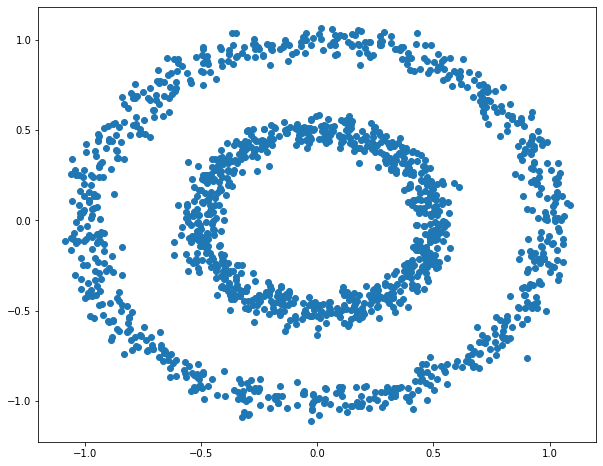

In [16]:
plt.scatter(clustering_data_2['X'],clustering_data_2['Y']);

可以看出，数据的形状特征非常有趣，数据主要集中在**两个环**上。  
下面来试试K均值的聚类效果。  
我们设定聚类簇数量为2，即K=2。

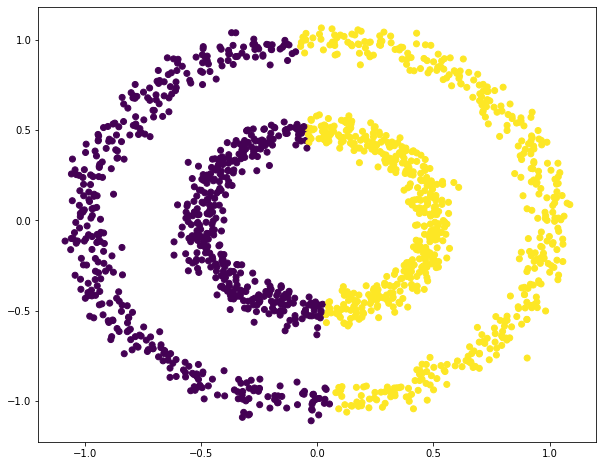

In [17]:
kmeans_2 = KMeans(n_clusters=2).fit(clustering_data_2)
cluster_assignment = kmeans_2.predict(clustering_data_2)
plt.scatter(clustering_data_2['X'],clustering_data_2['Y'],c=cluster_assignment);

很不幸，没有K=2不能进行正确的聚类。试着增加聚类簇数量，设为K-3。

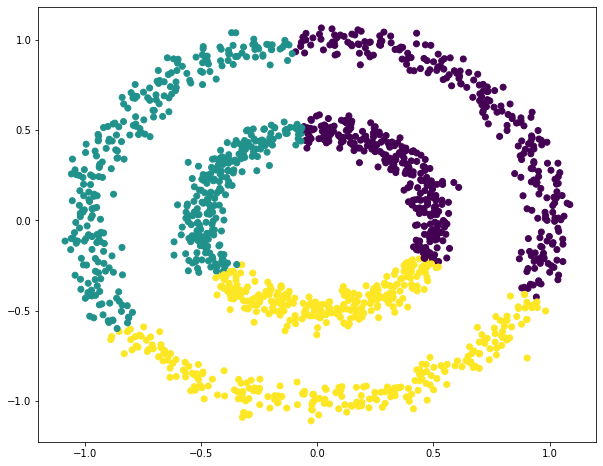

In [18]:
kmeans_2 = KMeans(n_clusters=3).fit(clustering_data_2)
cluster_assignment = kmeans_2.predict(clustering_data_2)
plt.scatter(clustering_data_2['X'],clustering_data_2['Y'],c=cluster_assignment);

仍旧不能进行很好的聚类。可以看出K-均值聚类算法不能很好地处理这类数据样本的聚类。  
看看肘部法则曲线的表示结果，可以看出没有明显的肘部特征出现。

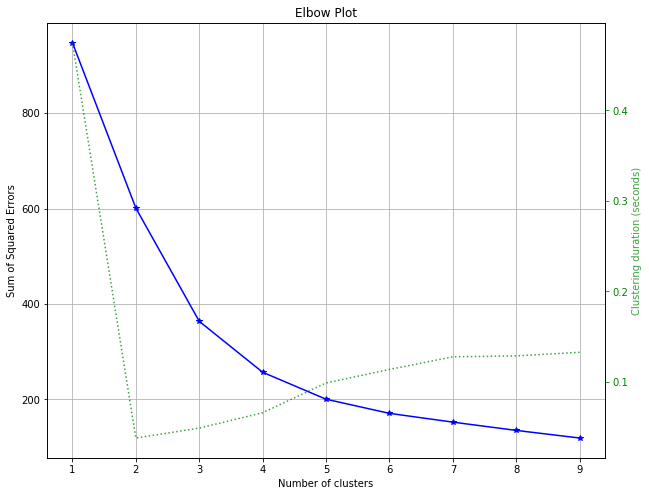

In [19]:
kmeans_elbow_check = KMeans()
scikitplot.cluster.plot_elbow_curve(kmeans_elbow_check,X=clustering_data_2, cluster_ranges=range(1, 10))

### 2. 分层聚类法(Hierarchical Clustering)

分层聚类是一种构建聚类层次结构的算法。  
因为采用K-均值聚类算法不能很好地解决前面实验中第2类数据样本的聚类，下面我们用层次聚类法来处理。

创建层次聚类算法对象

In [20]:
hierarchical_clustering = SpectralClustering(n_clusters=3, affinity="nearest_neighbors")

开始执行聚类操作，先对前面实验中第1类数据测试聚类效果

In [21]:
hierarchical_clustering.fit(clustering_data_1)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

看看聚类效果

In [22]:
cluster_assignment = hierarchical_clustering.labels_

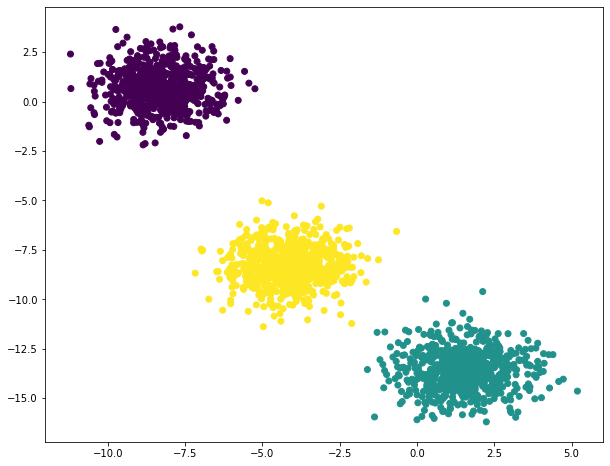

In [23]:
plt.scatter(clustering_data_1['X'],clustering_data_1['Y'],c=cluster_assignment)

再测试第2类样本数据的聚类效果，设置聚类簇为2

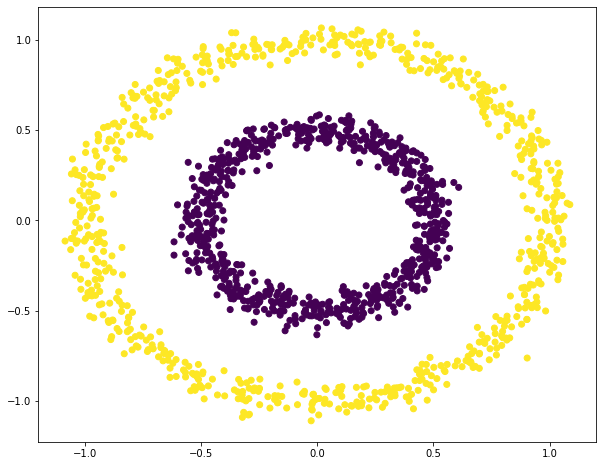

In [24]:
hierarchical_clustering = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
hierarchical_clustering.fit(clustering_data_2)
cluster_assignment = hierarchical_clustering.labels_
plt.scatter(clustering_data_2['X'],clustering_data_2['Y'],c=cluster_assignment)

**显而易见，分层聚类法能解决问题。**  
我们再试试另一类特殊的样本数据

In [25]:
clustering_data_3 = pandas.read_csv('./Datasets/clustering_data_3.csv')

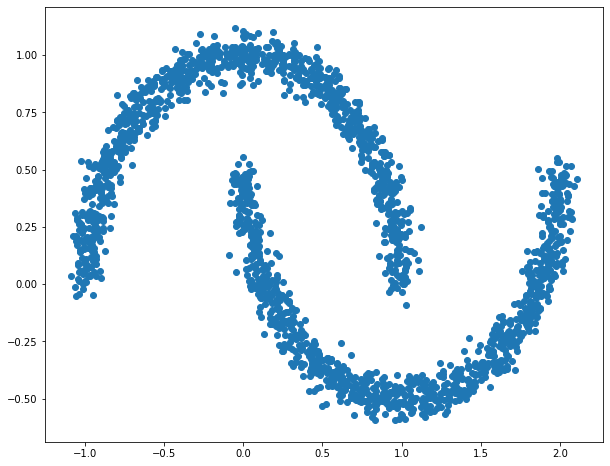

In [26]:
plt.scatter(clustering_data_3['X'],clustering_data_3['Y'])

设置聚类簇为2进行聚类处理

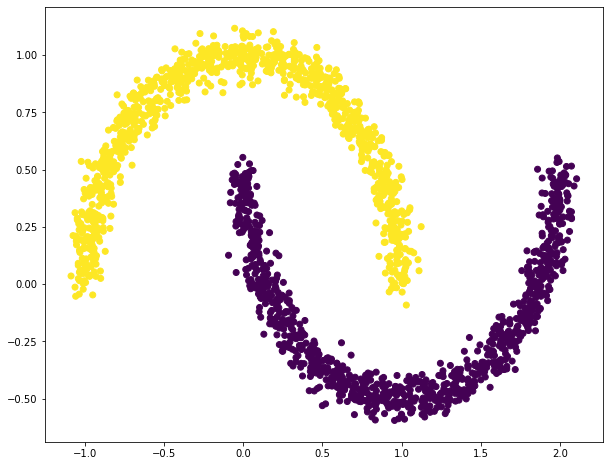

In [27]:
hierarchical_clustering = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
hierarchical_clustering.fit(clustering_data_3)
cluster_assignment = hierarchical_clustering.labels_
plt.scatter(clustering_data_3['X'],clustering_data_3['Y'],c=cluster_assignment)

与K-均值聚类算法相比，分层聚类能得到更好的效果。

### 3. 实验思考  
1. 举例说明聚类的主要应用场景
2. 说明聚类算法的局限性
3. 尝试解释聚类算法的工作原理